In [1]:
n <- 1000
betas <- rbeta(n,2,2)

In [2]:
betas[1:5]

[1] 0.4189810 0.6072009 0.6627048 0.5298795 0.9062318

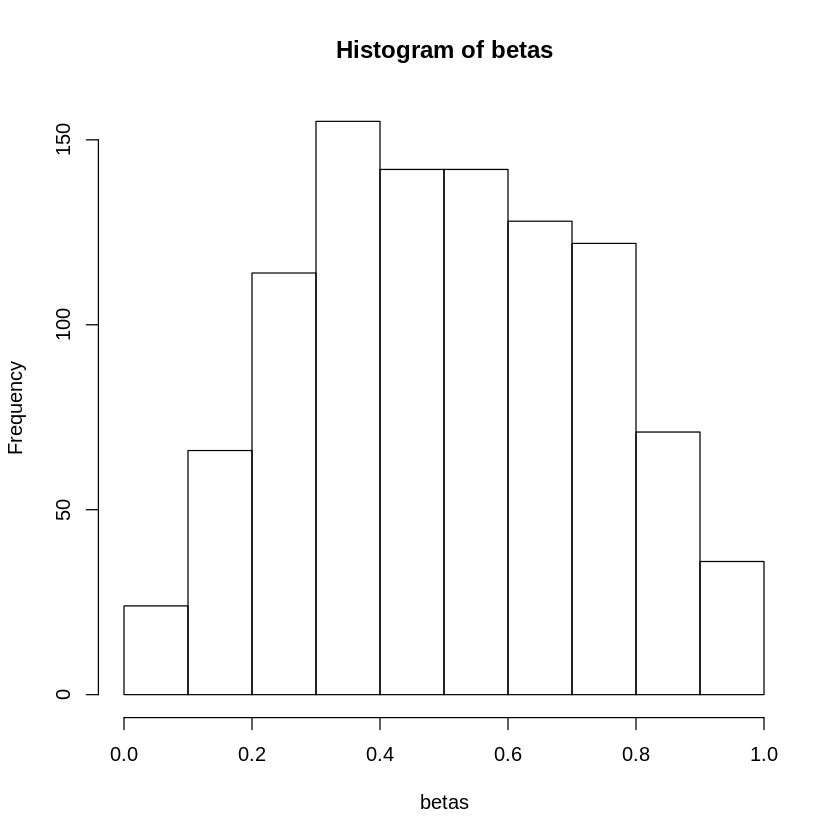

In [3]:
hist(betas)

In [16]:
sinh(2)

[1] 3.62686

In [4]:
D <- 1

In [5]:
for(d in 1:D)
    {
    betas <- 1 + 1*sinh(1.1*asinh(betas)+1.2)
}
## a,b,c,d
## d seems to control the position

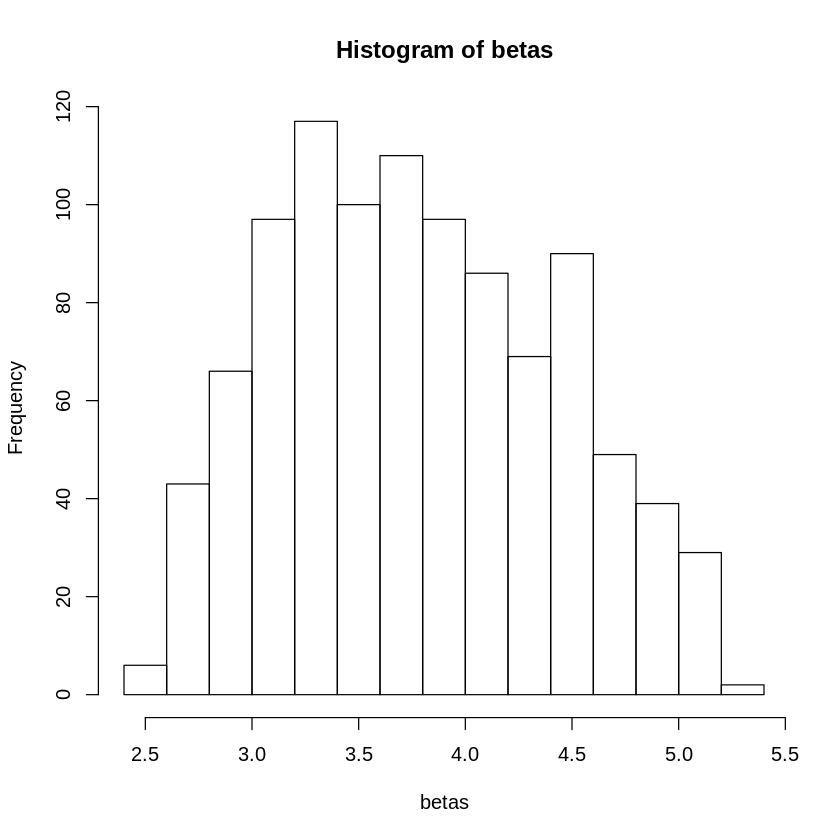

In [6]:
hist(betas)